In [1]:
# 패키지 불러오기

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# GPU를 활용할 수 있는 환경이 조성되어있지 않기에 CPU로 연산을 진행해야한다.

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


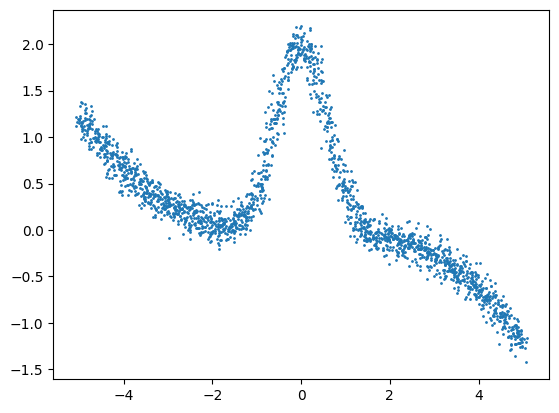

In [3]:
# 데이터 생성
# 비선형 회귀 1차원 문제 설정
import random

xs = np.linspace(-5, 5, 2000)
ys = []
for idx, x in enumerate(xs):
  xs[idx] = x + 0.1 * np.random.normal()
  y_value = -0.01*x**3 + 2 * np.cos(x)*np.exp(-x**2)+0.1*np.random.normal()
  ys.append(y_value)
ys = np.array(ys)
plt.plot(xs, ys, 'o', markersize = 1)

In [4]:
test_idx = np.random.randint(0,len(xs),int(0.2*len(xs)))
x_test = xs[test_idx]
y_test = ys[test_idx]

mask = np.ones(len(xs), dtype=bool)
mask[test_idx] = False
xs = xs[mask,...]
ys = ys[mask,...]

In [5]:
# 검증용 데이터 세트
validation_idx = np.random.randint(0,len(xs),int(0.2*len(xs)))
x_valid = xs[validation_idx]
y_valid = ys[validation_idx]

mask = np.ones(len(xs), dtype=bool)
mask[validation_idx] = False
x_train = xs[mask,...]
y_train = ys[mask,...]

In [6]:
# 사용자 정의 데이터 세트 제작
class MyDataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.Tensor(x).to(device).view(-1,1)
    self.y = torch.Tensor(y).to(device).view(-1,1)

  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]

  def __len__(self):
    return len(self.x)

In [7]:
x_min, x_max = x_train.min(), x_train.max()
y_min, y_max = y_train.min(), y_train.max()

In [8]:
# 입력 데이터와 레이블의 전처리를 담당하는 함수
def normalization(x, y):
  x = (x - x_min) / (x_max - x_min)
  y = (y - y_min) / (y_max - y_min)
  return x,y

In [9]:
# 정규화된 데이터와 레이블을 원래대로 바꿔주는 함수

def unnormalization(x, y):
  x = x*(x_max-x_min)+x_min
  y = y*(y_max-y_min)+y_min
  return x,y

In [10]:
# 훈련-검증 데이터 정규화
x_train, y_train = normalization(x_train, y_train)
x_valid, y_valid = normalization(x_valid, y_valid)

# 데이터 세트 및 데이터 로더 정의
train_dataset = MyDataset(x_train, y_train)
valid_dataset = MyDataset(x_valid, y_valid)

In [11]:
train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
valid_dataloader = DataLoader(valid_dataset, batch_size = 32, shuffle = False)

In [12]:
# 신경망 제작

class MyModel(nn.Module):
  def __init__(self):
    super(MyModel,self).__init__()
    self.lin1 = nn.Linear(1,32)
    self.lin2 = nn.Linear(32,32)
    self.lin3 = nn.Linear(32,32)
    self.lin4 = nn.Linear(32,1)

  def forward(self,x):
    x = F.tanh(self.lin1(x))
    x = F.tanh(self.lin2(x))
    x = F.tanh(self.lin3(x))
    x = self.lin4(x)
    return x

In [13]:
model = MyModel().to(device)
optimizer = optim.Adam(model.parameters(), lr = 1e-04, weight_decay=1e-12)
criterion = nn.MSELoss()

In [14]:
# 학습
for epoch in range(2000):
  train_loss, valid_loss = 0, 0
  cnt_train, cnt_valid = 0, 0
  for x,y in train_dataloader:
    y_infer = model(x)
    loss = criterion(y_infer,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    cnt_train += 1
  with torch.no_grad():
    for x,y in valid_dataloader:
      y_infer = model(x)
      loss = criterion(y_infer, y)
      valid_loss += loss.item()
      cnt_valid += 1
  if epoch % 100 == 0:
    print(f'{epoch} Epoch 학습정보')
    print(f'Loss: {train_loss/cnt_train:.4f}(Train_data),{valid_loss/cnt_valid:.4f}(Validation_data)')

0 Epoch 학습정보
Loss: 0.1707(Train_data),0.0981(Validation_data)
100 Epoch 학습정보
Loss: 0.0195(Train_data),0.0157(Validation_data)
200 Epoch 학습정보
Loss: 0.0049(Train_data),0.0044(Validation_data)
300 Epoch 학습정보
Loss: 0.0015(Train_data),0.0017(Validation_data)
400 Epoch 학습정보
Loss: 0.0015(Train_data),0.0017(Validation_data)
500 Epoch 학습정보
Loss: 0.0014(Train_data),0.0017(Validation_data)
600 Epoch 학습정보
Loss: 0.0014(Train_data),0.0016(Validation_data)
700 Epoch 학습정보
Loss: 0.0014(Train_data),0.0016(Validation_data)
800 Epoch 학습정보
Loss: 0.0014(Train_data),0.0016(Validation_data)
900 Epoch 학습정보
Loss: 0.0014(Train_data),0.0016(Validation_data)
1000 Epoch 학습정보
Loss: 0.0014(Train_data),0.0016(Validation_data)
1100 Epoch 학습정보
Loss: 0.0014(Train_data),0.0015(Validation_data)
1200 Epoch 학습정보
Loss: 0.0014(Train_data),0.0016(Validation_data)
1300 Epoch 학습정보
Loss: 0.0013(Train_data),0.0016(Validation_data)
1400 Epoch 학습정보
Loss: 0.0014(Train_data),0.0016(Validation_data)
1500 Epoch 학습정보
Loss: 0.0013(Train_da

In [15]:
x_test, y_test = normalization(x_test, y_test)
x_test_torch = torch.Tensor(x_test).view(-1,1)
y_test_torch = torch.Tensor(y_test).view(-1,1)
y_test_infer = model(x_test_torch)
loss = criterion(y_test_infer, y_test_torch).item()
print(f'테스트 데이터셋 error: {loss}')

테스트 데이터셋 error: 0.0014484241837635636


In [28]:
# 입력 데이터를 생성, 추론 및 후처리 과정

x_infer = torch.linspace(-5,5,100).view(-1,1)
x_infer = (x_infer-x_train.min())/(x_train.max()-x_train.min())
y_infer = model(x_infer)
x_infer = x_infer.detach().cpu().numpy().reshape(-1,)
y_infer = y_infer.detach().cpu().numpy().reshape(-1,)

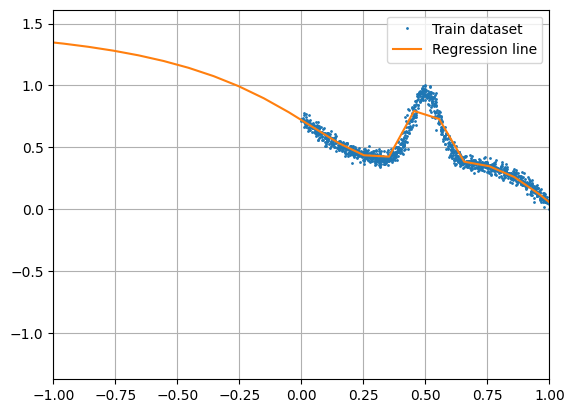

In [32]:
# 시각화
plt.plot(x_train, y_train, 'o', markersize = 1, label = 'Train dataset')
plt.plot(x_infer, y_infer, '-', markersize = 1, label = 'Regression line')
plt.xlim(-1,1)
plt.grid()
plt.legend()